In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
df = load_breast_cancer()

In [33]:
print(df['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [34]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [35]:
x = df['data']
y = df['target']

y_label = df['target_names']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 777, stratify=y)
len(x_train), x_train.shape

(426, (426, 30))

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
scores = []
weights = []
for c in [0.01, 0.1, 1, 10, 100, 1000, 10000]:
    model = LogisticRegression(penalty= 'l2', C=c, max_iter=100000)
    model.fit(x_train, y_train)
    model.score(x_train, y_train), model.score(x_test, y_test)
    tr_score = model.score(x_train, y_train)
    te_score = model.score(x_test, y_test)
    scores.append((c, tr_score, te_score))

c:\Users\human\.conda\envs\human-da-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
scores

[(0.01, 0.9483568075117371, 0.965034965034965),
 (0.1, 0.9507042253521126, 0.958041958041958),
 (1, 0.960093896713615, 0.958041958041958),
 (10, 0.971830985915493, 0.958041958041958),
 (100, 0.9788732394366197, 0.965034965034965),
 (1000, 0.9859154929577465, 0.9790209790209791),
 (10000, 0.9859154929577465, 0.972027972027972)]

In [42]:
scores2= pd.DataFrame(scores, columns=['c','train','test'])

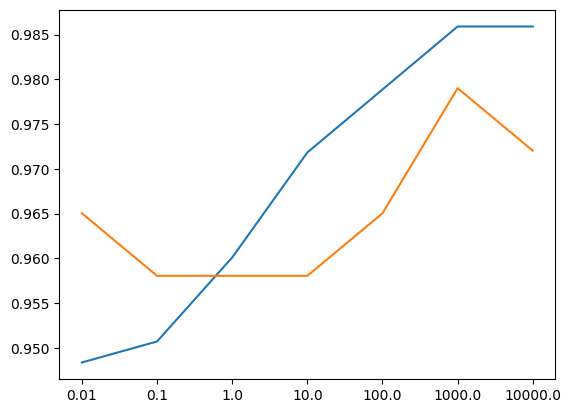

In [43]:
plt.plot(scores2['c'].astype('str'), scores2['train'], label = 'train' )
plt.plot(scores2['c'].astype('str'), scores2['test'], label = 'test' )

최종모델에는 모든 데이터를 다준다

In [44]:
model = LogisticRegression(penalty= 'l2', C=1000, max_iter=100000)
model.fit(x, y)
model.score(x,y)

0.9859402460456942

In [46]:
import pickle

In [48]:
with open('models/Logreg.pickle', 'wb') as f:
    pickle.dump(model,f)

In [49]:
with open('models/Logreg.pickle', 'rb') as f:
    model = pickle.load(f)

In [51]:
model.predict(x_test[:5])

array([0, 0, 1, 1, 0])